In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in our data
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Check the info; missing values and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# 1. The data has no missing values
# 2. All the columns have their content in numerical values ideal for modelling

In [5]:
#Check for duplicates
data.duplicated().sum()

1

In [6]:
#Checking the duplicated row
duplic = data.duplicated()
duplicated_rows = data[duplic]
print(duplicated_rows)


     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [7]:
#Dropping the duplicate data
new_data = data.drop_duplicates()
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
new_data.duplicated().sum()

0

In [9]:
#Checking for outliers
new_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
mean = np.mean(new_data)
std_dev = np.std(data)
threshold = 2  # Define threshold (e.g., 2 or 3 standard deviations)
lower_limit = mean - threshold * std_dev
upper_limit = mean + threshold * std_dev

outliers = new_data[(new_data < lower_limit) | (new_data > upper_limit)]
print("Outliers detected using Standard Deviation Method:", outliers)


Outliers detected using Standard Deviation Method:      age  sex  cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    NaN  NaN NaN     NaN    NaN  1.0      NaN       NaN   NaN      NaN  0.0   
1    NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      3.5  0.0   
2    NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN  NaN   
3    NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN  NaN   
4    NaN  NaN NaN     NaN  354.0  NaN      NaN       NaN   NaN      NaN  NaN   
..   ...  ...  ..     ...    ...  ...      ...       ...   ...      ...  ...   
298  NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN  NaN   
299  NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN  NaN   
300  NaN  NaN NaN     NaN    NaN  1.0      NaN       NaN   NaN      3.4  NaN   
301  NaN  NaN NaN     NaN  131.0  NaN      NaN       NaN   NaN      NaN  NaN   
302  NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      N

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
outliers.sum()

age          464.0
sex            0.0
cp             0.0
trtbps      2502.0
chol        3656.0
fbs           45.0
restecg        8.0
thalachh    1140.0
exng           0.0
oldpeak       68.5
slp            0.0
caa           76.0
thall         18.0
output         0.0
dtype: float64

In [ ]:
q1 = np.percentile(new_data, 25)
q3 = np.percentile(new_data, 75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers_iqr = new_data[(new_data < lower_limit) | (new_data > upper_limit)]
print("Outliers detected using IQR Method:", outliers_iqr)


Outliers detected using IQR Method:      age  sex  cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    NaN  NaN NaN   145.0  233.0  NaN      NaN     150.0   NaN      NaN  NaN   
1    NaN  NaN NaN     NaN  250.0  NaN      NaN     187.0   NaN      NaN  NaN   
2    NaN  NaN NaN     NaN  204.0  NaN      NaN     172.0   NaN      NaN  NaN   
3    NaN  NaN NaN     NaN  236.0  NaN      NaN     178.0   NaN      NaN  NaN   
4    NaN  NaN NaN     NaN  354.0  NaN      NaN     163.0   NaN      NaN  NaN   
..   ...  ...  ..     ...    ...  ...      ...       ...   ...      ...  ...   
298  NaN  NaN NaN   140.0  241.0  NaN      NaN       NaN   NaN      NaN  NaN   
299  NaN  NaN NaN     NaN  264.0  NaN      NaN       NaN   NaN      NaN  NaN   
300  NaN  NaN NaN   144.0  193.0  NaN      NaN     141.0   NaN      NaN  NaN   
301  NaN  NaN NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN  NaN   
302  NaN  NaN NaN     NaN  236.0  NaN      NaN     174.0   NaN      NaN  NaN   

   

In [ ]:
outliers_iqr.sum()

age             0.0
sex             0.0
cp              0.0
trtbps      14685.0
chol        74186.0
fbs             0.0
restecg         0.0
thalachh    35260.0
exng            0.0
oldpeak         0.0
slp             0.0
caa             0.0
thall           0.0
output          0.0
dtype: float64

ValueError: ignored

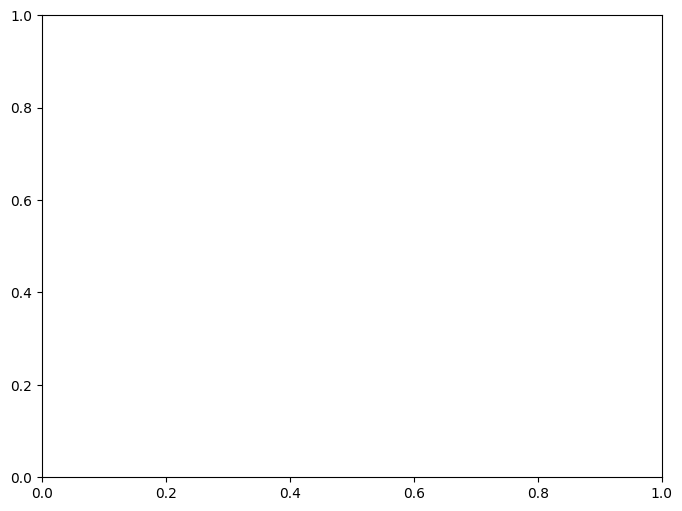

In [ ]:
#data for the scatter plot
x_values = new_data.drop(columns = ['output'])
y_values = new_data['output']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))  # Adjusting figure size (optional)
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Adding a legend (if multiple datasets are plotted)
plt.legend()

# Displaying the plot
plt.grid(True)  # Adding gridlines (optional)
plt.show()


<Axes: >

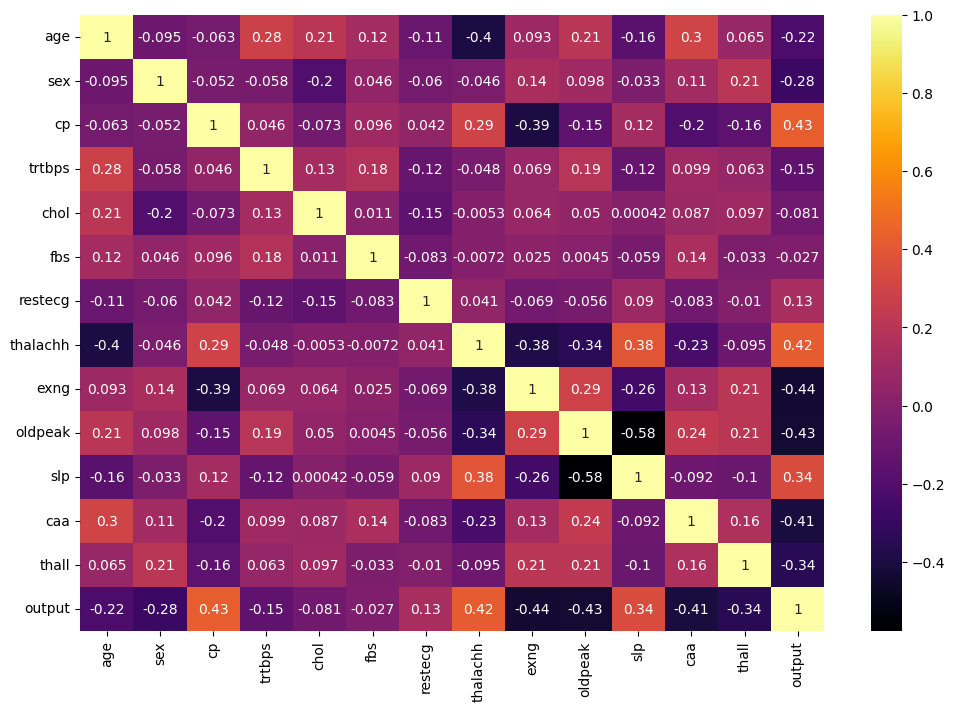

In [ ]:
#checking for correlation

## Create corr matrix
corr_matrix = new_data.corr()

## Visualize it
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno')